# Detección de anomalías con Autoencoder

La __detección de anomalías__ es una técnica utilizada en el análisis de datos para identificar patrones inusuales o atípicos. A lo largo de este Notebook se mostrará cómo utilizaran diferentes herramientas para su detección.

Utilizaremos el famoso dataset conocido cómo _Breast Cancer Wisconsin_.
Puedes ver más información sobre el dataset en https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Carga y Análisis de los datos

Afortunadamente el repositorio datasets de sklearn incorpora el load_breast_cancer, por lo que podremos cargarlo directamente

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer(as_frame=True)
data = dataset.frame

Podemos cómo en este caso las clases posibles para los ejemplos son "malignant" o "benign".

In [2]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

Usando la función feature_names seguida de la función size podemos ver la cantidad de atributos o características cada ejemplo, que en este caso consta de 30.

In [3]:
dataset.feature_names.size

30

Podemos ver los datos de nuestro conjunto de datos para poder entenderlos mejor.

In [4]:
dataset.data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Con la función describe vemos las estadísticas más relevantes del conjunto de datos (media, desviación típica, valor máximo...)

In [5]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Guardamos en X los datos de los atributos así como en y las clase de cada ejemplo.

In [6]:
X = dataset.data
y = dataset.target

Es un buen momento de ver que variables son irrelevantes para el modelo. Para ello buscaremos en el siguiente mapa de calor aquellas no tengan correlación con el atributo target (donde veremos un valor 0) y además tenga una alta correlación con cualquier otro atributo, ya que esto nos puede decir que los datos son redundantes.

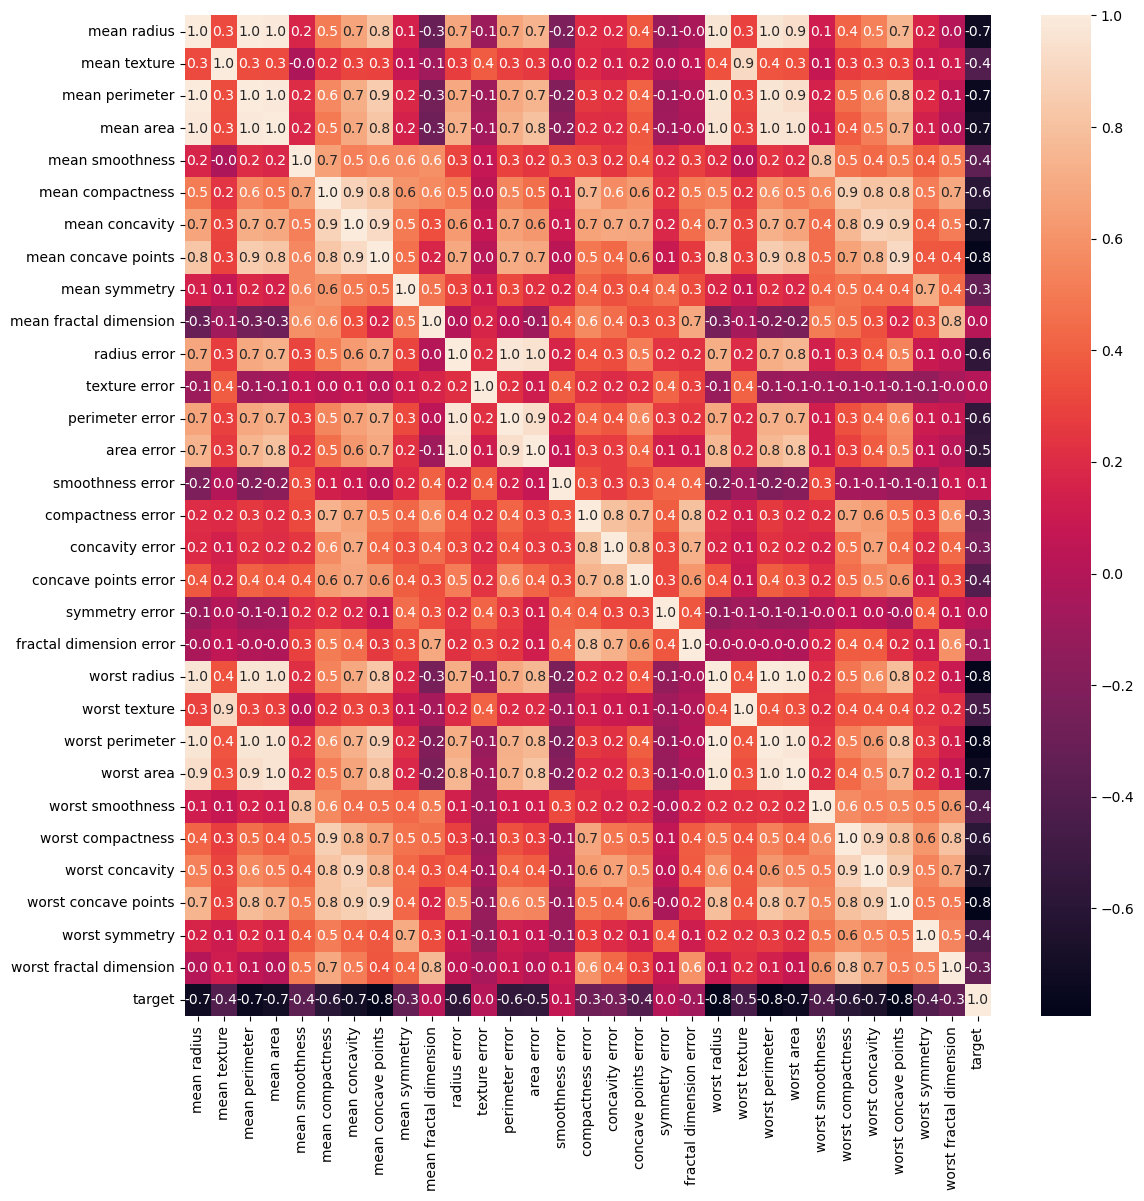

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 13))
sns.heatmap(data.corr(), annot=True, fmt=".1f")
plt.show()


In [8]:
X = dataset.data.drop("mean fractal dimension", axis=1)

Podemos visualizar la cantidad de elementos que hay por clase

In [9]:
data['target'].value_counts().sort_index().get(1,0)

357

In [10]:
data['target'].value_counts().sort_index().get(0,0)

212

A continuación se muestra de manera gráfica la distribución de los datos del dataset, dividiéndolos por clase

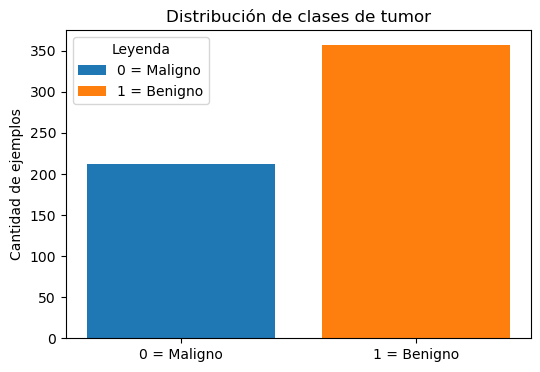

In [11]:
# Calculamos los conteos de cada clase
conteos = data['target'].value_counts().sort_index()  # Asegurar el orden correcto de las clases

# Crear una figura y un eje
plt.figure(figsize=(6, 4))
# Dibujar un gráfico de barras para cada clase con una etiqueta
plt.bar(0, conteos.get(0, 0), color='#1f77b4', label='0 = Maligno')  # Asumimos que existe la posibilidad de que no haya datos para alguna clase
plt.bar(1, conteos.get(1, 0), color='#ff7f0e', label='1 = Benigno')  # Asumimos que existe la posibilidad de que no haya datos para alguna clase

plt.bar(conteos.index, conteos.values, color=['#1f77b4', '#ff7f0e'])  # Colores azul y naranja

# Agregar título y etiquetas
plt.title('Distribución de clases de tumor')
#plt.xlabel('Clase (0 = Maligno, 1 = Benigno)')
plt.ylabel('Cantidad de ejemplos')

# Configurar las etiquetas del eje x para que muestren claramente qué representa cada barra
plt.xticks([0, 1], ['0 = Maligno', '1 = Benigno'])
plt.legend(title='Leyenda')
# Mostrar el gráfico
plt.show()


Como podemos ver en la distribución de los datos, no nos encontramos con un caso __anómalo__, así que deberemos recrearlo.

## Modificación del conjunto de datos

Cómo queremos detectar casos anómalos y en este caso la distribución de los ejemplos no cumple con esta condición deberemos modificar la cantidad de datos. Para ello escogeremos un porcentaje de casos malignos que sea anómalo.

In [12]:
porcentaje_anomalias = 0.1 # % de instancias malignas

Creamos máscaras para los datos benignos y los datos malignos, modificamos la proporcionalidades y mezclamos los conjuntos.

In [13]:
mask = y == 1  # Instancias benignas
X_benignas = X[mask]
X_malignas = X[~mask]
num_malignas = int(porcentaje_anomalias * len(X_benignas))
X_nuevo = np.concatenate([X_malignas[:num_malignas], X_benignas], axis=0)
y_nuevo = np.concatenate([np.zeros(num_malignas), np.ones(len(X_benignas))], axis=0)

In [14]:
pd.Series(y_nuevo).value_counts()

1.0    357
0.0     35
Name: count, dtype: int64

Podemos comprobar que ahora hay un caso anómalo de ejemplos con la clase maligno.

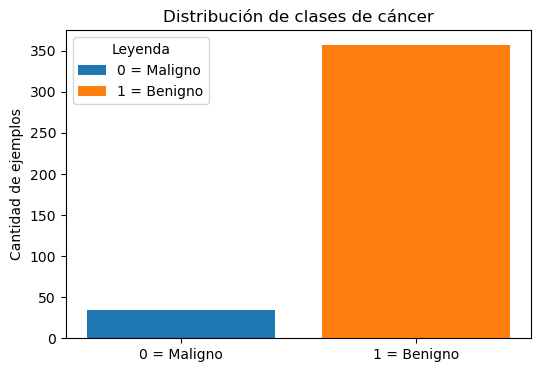

In [15]:
# Calculamos los conteos de cada clase
conteos = pd.Series(y_nuevo).value_counts().sort_index() # Asegurar el orden correcto de las clases

# Creación de la figura
plt.figure(figsize=(6, 4))
# Dibujar un gráfico de barras para cada clase con una etiqueta
plt.bar(0, conteos.get(0, 0), color='#1f77b4', label='0 = Maligno')  # Asumimos que existe la posibilidad de que no haya datos para alguna clase
plt.bar(1, conteos.get(1, 0), color='#ff7f0e', label='1 = Benigno')  # Asumimos que existe la posibilidad de que no haya datos para alguna clase

plt.bar(conteos.index, conteos.values, color=['#1f77b4', '#ff7f0e'])  # Colores azul y naranja

# Agregar título y etiquetas
plt.title('Distribución de clases de cáncer')
#plt.xlabel('Clase (0 = Maligno, 1 = Benigno)')
plt.ylabel('Cantidad de ejemplos')

# Configurar las etiquetas del eje x para que muestren claramente qué representa cada barra
plt.xticks([0, 1], ['0 = Maligno', '1 = Benigno'])
plt.legend(title='Leyenda')
# Mostrar el gráfico
plt.show()


## Preparación del conjunto de entrenamiento

Dividiremos el conjunto de datos en un conjunto de entrenamiento y otro de validación (o test) para poder entrenar nuestro modelo

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y_nuevo, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Vamos a crear máscaras para dividir los conjuntos de datos según las clases de cada uno de sus ejemplos.

In [17]:
# Mascaras para identificar las clases en los conjuntos
mask_clase_0_tr = (y_train == 0)
mask_clase_0_v = (y_valid == 0)
mask_clase_0_test = (y_test == 0)
mask_clase_1_tr = (y_train == 1)
mask_clase_1_v = (y_valid == 1)
mask_clase_1_test = (y_test == 1)

# Filtra X para quedarte solo con las instancias de la clase deseada
X_train_clase_0_S = X_train[mask_clase_0_tr]
X_valid_clase_0_S =  X_valid[mask_clase_0_v]
X_test_clase_0_S = X_test[mask_clase_0_test]
X_train_clase_1_S = X_train[mask_clase_1_tr]
X_valid_clase_1_S =  X_valid[mask_clase_1_v]
X_test_clase_1_S = X_test[mask_clase_1_test]

Existen diferentes modos de normalizar nuestros datos, en nuestro caso utilizaremos StandardScaler para poder normalizar los datos de entrada al modelo.
Estoy tendrá como resultado que la desviación típica sea 1.

In [18]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
normalizador=StandardScaler().fit(X_train_clase_1_S)
X_train_clase_0=normalizador.transform(X_train_clase_0_S)
X_valid_clase_0=normalizador.transform(X_valid_clase_0_S)
X_test_clase_0=normalizador.transform(X_test_clase_0_S)
X_train_clase_1=normalizador.transform(X_train_clase_1_S)
X_valid_clase_1=normalizador.transform(X_valid_clase_1_S)
X_test_clase_1=normalizador.transform(X_test_clase_1_S)

X_train_norm=normalizador.transform(X_train)
X_valid_norm=normalizador.transform(X_valid)
X_test_norm=normalizador.transform(X_test)

with open('normalizador1.pkl', 'wb') as file:
    pickle.dump(normalizador, file) # Se guarda un fichero con la configuración de normalización

## Construcción del Autoencoder

Comprimiremos la información de los datos de entrada para luego volver a descomprimirla. Para ello crearemos un autoencoder

<img src="imagenes/autoencoder_architecture.png" alt="Arquitectura del Autoencoder" width="500" height="300"/>


Escogemos el tamaño de neuronas de cada capa.

In [19]:
input_dim = X_train_norm.shape[1]
encoding_dim = 16  # Dimensión de la codificación
hidden_dim = 8

Para construir la estructura usaremos __regularización l1__, para de este modo poder prevenir el sobreajuste. La estructura se dividirá en capas encoder y decoder (codificación y decodificación).

In [20]:
from keras import regularizers

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD

learning_rate = 1e-2

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 29)                493       
                                                                 
Total params: 1325 (5.18 KB)
Trainable params: 1325 (5.18 

## Aprendizaje del modelo
Una vez construido el autoencoder los ajustaremos para que nos de un aprendizaje correcto a nuestro caso, para ello hay que probar con diferentes optimizadores y funciones de perdida. En este caso el optimizador Adam y la función de perdida mse (error cuadrático medio).

In [21]:
autoencoder.compile(metrics=['accuracy'],optimizer=Adam(), loss='mse')

In [22]:
from tensorflow.keras import layers, callbacks
from keras.callbacks import ModelCheckpoint, TensorBoard
cp = ModelCheckpoint(filepath="autoencoder55.h5",
                               save_best_only=True,
                               verbose=0)
history = autoencoder.fit(X_train_clase_1, X_train_clase_1, epochs=300, batch_size=128, shuffle=True, validation_data=(X_valid_clase_1, X_valid_clase_1),callbacks=[callbacks.EarlyStopping(monitor="val_loss", patience=20, mode="min")
    ,cp],)

Epoch 1/300

2/2 [==============================] - 1s 139ms/step - loss: 1.0840 - accuracy: 0.0260 - val_loss: 1.0298 - val_accuracy: 0.0000e+00
Epoch 2/300
2/2 [==============================] - 0s 33ms/step - loss: 1.0748 - accuracy: 0.0260 - val_loss: 1.0232 - val_accuracy: 0.0000e+00
Epoch 3/300
2/2 [==============================] - 0s 32ms/step - loss: 1.0670 - accuracy: 0.0260 - val_loss: 1.0175 - val_accuracy: 0.0000e+00
Epoch 4/300
2/2 [==============================] - 0s 33ms/step - loss: 1.0612 - accuracy: 0.0130 - val_loss: 1.0125 - val_accuracy: 0.0172
Epoch 5/300
2/2 [==============================] - 0s 32ms/step - loss: 1.0553 - accuracy: 0.0130 - val_loss: 1.0082 - val_accuracy: 0.0172
Epoch 6/300
2/2 [==============================] - 0s 32ms/step - loss: 1.0503 - accuracy: 0.0173 - val_loss: 1.0046 - val_accuracy: 0.0345


C:\Users\marco\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 7/300
2/2 [==============================] - 0s 32ms/step - loss: 1.0461 - accuracy: 0.0173 - val_loss: 1.0012 - val_accuracy: 0.0172
Epoch 8/300
2/2 [==============================] - 0s 32ms/step - loss: 1.0420 - accuracy: 0.0173 - val_loss: 0.9979 - val_accuracy: 0.0172
Epoch 9/300
2/2 [==============================] - 0s 31ms/step - loss: 1.0384 - accuracy: 0.0216 - val_loss: 0.9945 - val_accuracy: 0.0345
Epoch 10/300
2/2 [==============================] - 0s 33ms/step - loss: 1.0351 - accuracy: 0.0216 - val_loss: 0.9909 - val_accuracy: 0.0345
Epoch 11/300
2/2 [==============================] - 0s 31ms/step - loss: 1.0319 - accuracy: 0.0260 - val_loss: 0.9873 - val_accuracy: 0.0345
Epoch 12/300
2/2 [==============================] - 0s 31ms/step - loss: 1.0282 - accuracy: 0.0303 - val_loss: 0.9836 - val_accuracy: 0.0517
Epoch 13/300
2/2 [==============================] - 0s 33ms/step - loss: 1.0247 - accuracy: 0.0303 - val_loss: 0.9797 - val_accuracy: 0.0690
Epoch 14/300
2/2

2/2 [==============================] - 0s 36ms/step - loss: 0.4026 - accuracy: 0.2208 - val_loss: 0.3934 - val_accuracy: 0.2759
Epoch 124/300
2/2 [==============================] - 0s 33ms/step - loss: 0.3991 - accuracy: 0.2208 - val_loss: 0.3901 - val_accuracy: 0.2759
Epoch 125/300
2/2 [==============================] - 0s 33ms/step - loss: 0.3952 - accuracy: 0.2208 - val_loss: 0.3870 - val_accuracy: 0.2759
Epoch 126/300
2/2 [==============================] - 0s 32ms/step - loss: 0.3919 - accuracy: 0.2165 - val_loss: 0.3840 - val_accuracy: 0.2759
Epoch 127/300
2/2 [==============================] - 0s 33ms/step - loss: 0.3884 - accuracy: 0.2208 - val_loss: 0.3810 - val_accuracy: 0.2759
Epoch 128/300
2/2 [==============================] - 0s 32ms/step - loss: 0.3851 - accuracy: 0.2208 - val_loss: 0.3782 - val_accuracy: 0.2931
Epoch 129/300
2/2 [==============================] - 0s 32ms/step - loss: 0.3818 - accuracy: 0.2165 - val_loss: 0.3753 - val_accuracy: 0.2931
Epoch 130/300
2/2 [=

Epoch 181/300
2/2 [==============================] - 0s 32ms/step - loss: 0.2801 - accuracy: 0.2468 - val_loss: 0.2818 - val_accuracy: 0.3966
Epoch 182/300
2/2 [==============================] - 0s 33ms/step - loss: 0.2788 - accuracy: 0.2511 - val_loss: 0.2801 - val_accuracy: 0.3793
Epoch 183/300
2/2 [==============================] - 0s 33ms/step - loss: 0.2774 - accuracy: 0.2511 - val_loss: 0.2786 - val_accuracy: 0.3793
Epoch 184/300
2/2 [==============================] - 0s 32ms/step - loss: 0.2761 - accuracy: 0.2511 - val_loss: 0.2772 - val_accuracy: 0.3793
Epoch 185/300
2/2 [==============================] - 0s 30ms/step - loss: 0.2748 - accuracy: 0.2554 - val_loss: 0.2758 - val_accuracy: 0.3793
Epoch 186/300
2/2 [==============================] - 0s 32ms/step - loss: 0.2735 - accuracy: 0.2554 - val_loss: 0.2744 - val_accuracy: 0.3793
Epoch 187/300
2/2 [==============================] - 0s 32ms/step - loss: 0.2723 - accuracy: 0.2511 - val_loss: 0.2730 - val_accuracy: 0.3793
Epoch 

Epoch 239/300
2/2 [==============================] - 0s 29ms/step - loss: 0.2349 - accuracy: 0.2857 - val_loss: 0.2363 - val_accuracy: 0.4138
Epoch 240/300
2/2 [==============================] - 0s 31ms/step - loss: 0.2344 - accuracy: 0.2857 - val_loss: 0.2358 - val_accuracy: 0.4138
Epoch 241/300
2/2 [==============================] - 0s 30ms/step - loss: 0.2340 - accuracy: 0.2814 - val_loss: 0.2351 - val_accuracy: 0.4138
Epoch 242/300
2/2 [==============================] - 0s 31ms/step - loss: 0.2336 - accuracy: 0.2814 - val_loss: 0.2346 - val_accuracy: 0.3966
Epoch 243/300
2/2 [==============================] - 0s 32ms/step - loss: 0.2332 - accuracy: 0.2814 - val_loss: 0.2343 - val_accuracy: 0.3966
Epoch 244/300
2/2 [==============================] - 0s 31ms/step - loss: 0.2327 - accuracy: 0.2814 - val_loss: 0.2340 - val_accuracy: 0.3966
Epoch 245/300
2/2 [==============================] - 0s 31ms/step - loss: 0.2323 - accuracy: 0.2771 - val_loss: 0.2337 - val_accuracy: 0.3966
Epoch 

Epoch 297/300
2/2 [==============================] - 0s 32ms/step - loss: 0.2145 - accuracy: 0.3117 - val_loss: 0.2192 - val_accuracy: 0.4483
Epoch 298/300
2/2 [==============================] - 0s 32ms/step - loss: 0.2142 - accuracy: 0.3074 - val_loss: 0.2189 - val_accuracy: 0.4310
Epoch 299/300
2/2 [==============================] - 0s 32ms/step - loss: 0.2139 - accuracy: 0.3117 - val_loss: 0.2184 - val_accuracy: 0.4138
Epoch 300/300
2/2 [==============================] - 0s 34ms/step - loss: 0.2135 - accuracy: 0.3074 - val_loss: 0.2180 - val_accuracy: 0.4310


Como podemos comprobar el modelo de aprendizaje llega a unos valores de pérdida relativamente bajos en función de los epoch realizados.

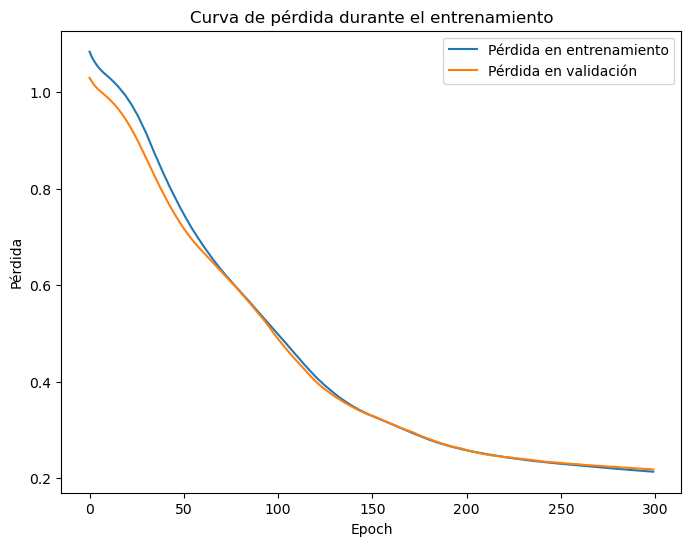

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Curva de pérdida durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
#plt.yticks([0, 1], [0,1])
plt.legend()
plt.show()

## Aciertos y fallos
Una vez el modelo ha aprendido correctamente los datos es momento de ver los fallos y aciertos en el modelo, para de este modo asegurarnos que el aprendizaje ha sido correcto.

In [24]:
# Calcular el error de reconstrucción en el conjunto de prueba
X_test_pred = autoencoder.predict(X_test_norm)
test_reconstruction_errors = np.mean(np.power(X_test_norm - X_test_pred,2), axis=1)
umbral_fijo= 0.7
y_pred = [1 if e < umbral_fijo else 0 for e in test_reconstruction_errors]

3/3 [==============================] - 0s 2ms/step


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Precisión:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Exactitud:', accuracy_score(y_test, y_pred))

Precisión: 0.9710144927536232
Exhaustividad: 0.9852941176470589
F1-score: 0.9781021897810219
Exactitud: 0.9620253164556962


[[ 9  2]
 [ 1 67]]


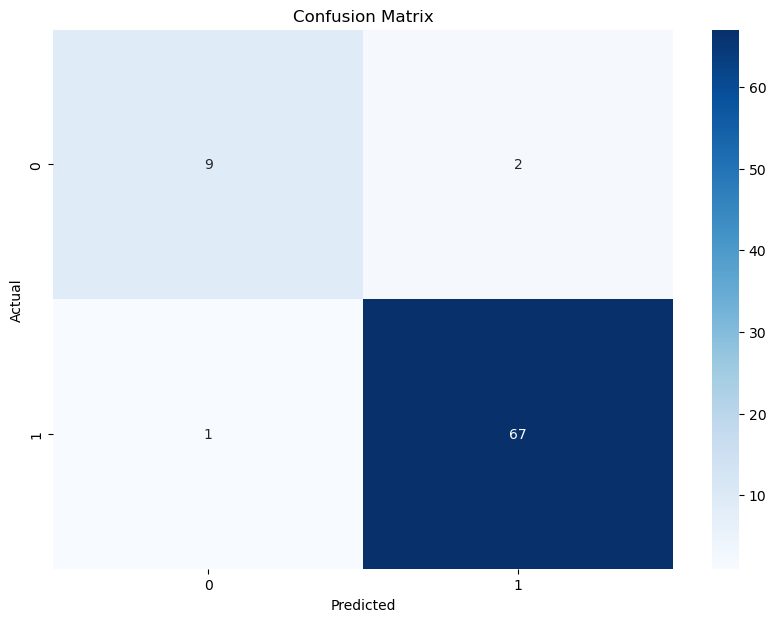

In [26]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Crear el mapa de calor
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.metrics import precision_recall_curve
precision, recall, umbral = precision_recall_curve(y_test, test_reconstruction_errors)

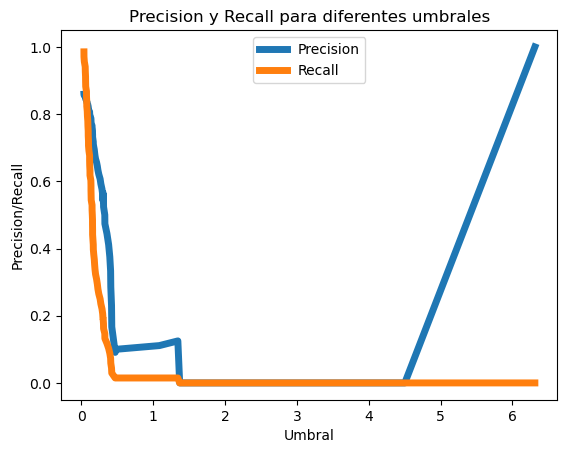

In [28]:
plt.plot(umbral, precision[1:], label="Precision",linewidth=5)
plt.plot(umbral, recall[1:], label="Recall",linewidth=5)
plt.title('Precision y Recall para diferentes umbrales')
plt.xlabel('Umbral')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

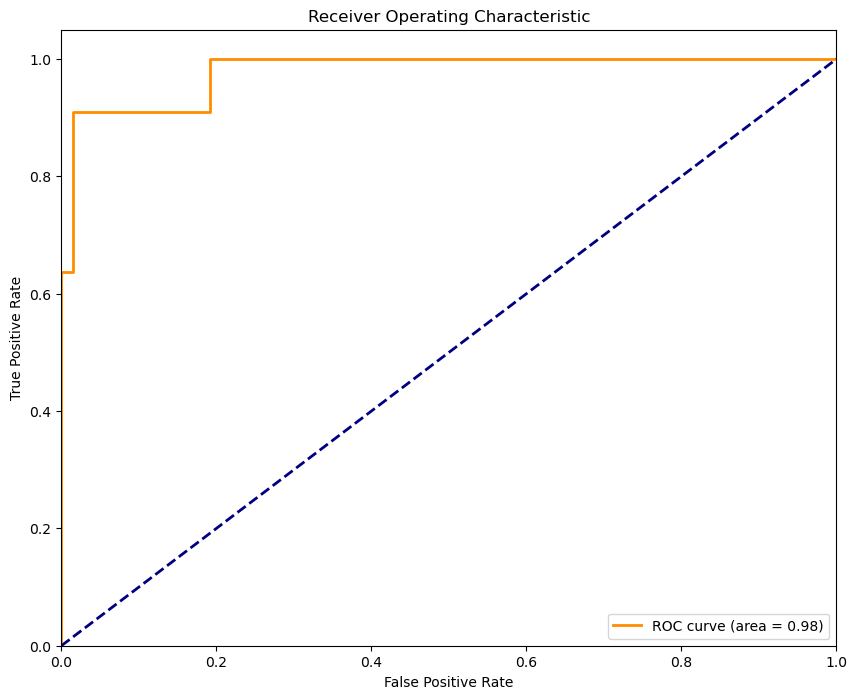

In [29]:
from sklearn.metrics import roc_curve, auc

# Calcular la Curva ROC y el Área Bajo la Curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, test_reconstruction_errors, pos_label=0)  # Asumiendo que la clase 0 es de datos anómalos

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [30]:
from IPython.core.display import HTML

HTML("""
<style>
.prompt {
    display: none;
}
</style>
""")

In [31]:
from IPython.core.display import HTML
HTML("<style>.rendered_html { font-size: 18px; }</style>")


In [32]:
from IPython.core.display import HTML

HTML("""
<style>
.CodeMirror {
    font-size: 18px;
}
</style>
""")


In [33]:
import pandas as pd

data = {
    'radius_mean': [17.99, 20.57, 19.69, 11.42, 20.29],
    'texture_mean': [10.38, 17.77, 21.25, 20.38, 14.34],
    'perimeter_mean': [122.8, 132.9, 130, 77.58, 135.1],
    'area_mean': [1001, 1326, 1203, 386.1, 1297],
    'smoothness_mean': [0.1184, 0.08474, 0.1096, 0.1425, 0.1003],
    'compactness_mean': [0.2776, 0.07864, 0.1599, 0.2839, 0.1328],
    'concavity_mean': [0.3001, 0.0869, 0.1974, 0.2414, 0.198],
    'concave_points_mean': [0.1471, 0.07017, 0.1279, 0.1052, 0.1043],
    'symmetry_mean': [0.2419, 0.1812, 0.2069, 0.2597, 0.1809],
    'fractal_dimension_mean': [0.07871, 0.05667, 0.05999, 0.09744, 0.05883],
    'radius_se': [1.095, 0.5435, 0.7456, 0.4956, 0.7572],
    'texture_se': [0.9053, 0.7339, 0.7869, 1.156, 0.7813],
    'perimeter_se': [8.589, 3.398, 4.585, 3.445, 5.438],
    'area_se': [153.4, 74.08, 94.03, 27.23, 94.44],
    'smoothness_se': [0.006399, 0.005225, 0.00615, 0.00911, 0.01149],
    'compactness_se': [0.04904, 0.01308, 0.04006, 0.07458, 0.02461],
    'concavity_se': [0.05373, 0.0186, 0.03832, 0.05661, 0.05688],
    'concave_points_se': [0.01587, 0.0134, 0.02058, 0.01867, 0.01885],
    'symmetry_se': [0.03003, 0.01389, 0.0225, 0.05963, 0.01756],
    'fractal_dimension_se': [0.006193, 0.003532, 0.004571, 0.009208, 0.005115],
    'radius_worst': [25.38, 24.99, 23.57, 14.91, 22.54],
    'texture_worst': [17.33, 23.41, 25.53, 26.5, 16.67],
    'perimeter_worst': [184.6, 158.8, 152.5, 98.87, 152.2],
    'area_worst': [2019, 1956, 1709, 567.7, 1575],
    'smoothness_worst': [0.1622, 0.1238, 0.1444, 0.2098, 0.1374],
    'compactness_worst': [0.6656, 0.1866, 0.4245, 0.8663, 0.205],
    'concavity_worst': [0.7119, 0.2416, 0.4504, 0.6869, 0.4],
    'concave_points_worst': [0.2654, 0.186, 0.243, 0.2575, 0.1625],
    'symmetry_worst': [0.4601,0.275,0.3613,0.6638,0.2364],
    'fractal_dimension_worst': [0.1189,0.08902,0.08758,0.173,0.07678],
                       }

# Crear el DataFrame
df = pd.DataFrame(data)

# Guardar el DataFrame como un archivo Excel
df.to_excel('WDBC2_Example_Data.xlsx', index=False)

# Experimentos del mismo modelo con Machine Learning
Se realizarán diferentes predicciones con otros modelos para poder ver la comparación en su funcionamiento bajo las mismas condiciones que nuestro modelo Autoencoder.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
Xn_train = X_train_clase_1
Xn_test = X_test_norm
y_check = y_train[y_train == 1]
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(Xn_train, y_check ) #Ajuste del modelo
pridct_Knn = knn.predict(X_test_norm)
print("Tasa de aciertos de Knn: {:.2f}".format(knn.score(X_test_norm, y_test)))

Tasa de aciertos de Knn: 0.86


In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(Xn_train, y_check)
pred_tree = tree.predict(Xn_test)
print("Tasa de acierto del árbol de decisión: {:.2f}".format(tree.score(Xn_test, y_test)))

Tasa de acierto del árbol de decisión: 0.86


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,max_features=8).fit(Xn_train, y_check)
predict_random_forests = rf.predict(Xn_test)
print("Tasa de aciertos de random forest: {:.2f}".format(rf.score(Xn_test, y_test)))

Tasa de aciertos de random forest: 0.86


Debido a que estamos intentando clasificar utilizando exclusivamente una sola muestra no podemos utilizar SVC, ya que no hay frontera de decisión posible cuando solo hay 1 sola clase en el entrenamiento.

In [37]:
#from sklearn.svm import SVC
#svm = SVC(gamma=0.001, C=10)
#svm.fit(X_train_clase_1, y_check)
#print("Tasa de aciertos de SVM: {:.2f}".format(svm.score(Xn_test, y_test)))

Podemos ver que los 3 modelos utilizamos tienen exactamente los mismos datos ya que al carecer muestras de clase Maligna no son capaces de clasificar estas mismas.

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Evaluación del mejor modelo de KNN
print("\n\nInforme de clasificación KNN")
y_pred_knn = knn.predict(Xn_test)
print(classification_report(y_test, y_pred_knn))


# Evaluación del mejor modelo de Random Forest
print("\n\nInforme de clasificación random forest")
y_pred_rf = rf.predict(Xn_test)
print(classification_report(y_test, y_pred_rf))


# Evaluación del mejor modelo de Random Forest
print("\n\nInforme de clasificación Árbol de decisión")
y_pred_svc = tree.predict(Xn_test)
print(classification_report(y_test, y_pred_svc))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Informe de clasificación KNN
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.86      1.00      0.93        68

    accuracy                           0.86        79
   macro avg       0.43      0.50      0.46        79
weighted avg       0.74      0.86      0.80        79



Informe de clasificación random forest
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.86      1.00      0.93        68

    accuracy                           0.86        79
   macro avg       0.43      0.50      0.46        79
weighted avg       0.74      0.86      0.80        79



Informe de clasificación Árbol de decisión
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.86      1.00      0.93        68

    accuracy                           0.86        79
   macro av

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

Todos estos errores son debidos a que los diferentes modelos de Machine Learning no han aprendido a clasificar correctamente, por lo que varios de sus valores obtenidos, como el de precisión, dan como resultado 0, que da problemas con las diferentes divisiones que se realizan en otras estadísticas.

Para poder contemplarlo mejor vemos aquí la matriz de confusión.

[[ 0 11]
 [ 0 68]]


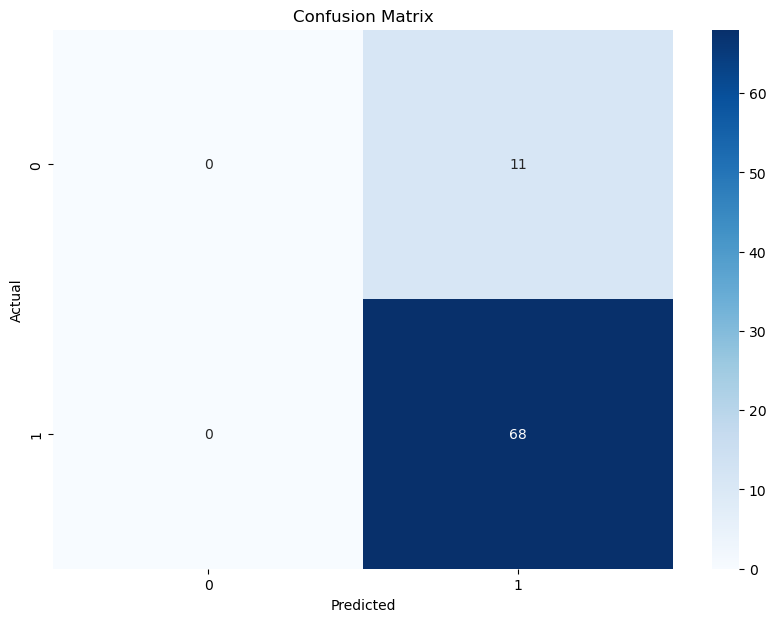

In [39]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)
# Crear el mapa de calor
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Como vemos nos acabamos de cerciorar de que los modelos están clasificando todas las muestras posibles como benignas, ya que no conocen el patrón de las malignas.

# 